# Laboratório 1

## Henrique Martinez Rocamora (9836332)
## Flávio Ferreira Menten (9836691)

## Parte A

Foi escolhido o exercício A3

###  **Determinar analiticamente a expansão em série de Fourier.**

A função apresentada tem período $T_0$ e é ímpar.

Sendo assim, $a_0$ = 0 e $a_k$ = 0.

Podemos então calcular $b_k$:

$$b_k = \frac{2}{T}\int_{0}^{T} x(t) \sin(k \omega_0 t) dt$$

$$b_k = \frac{2}{T_0}\left[\int_{0}^{T_0/4} \frac{4a}{T_0}t \sin(k \omega_0 t) dt + \int_{T_0/4}^{3T_0/4} (-\frac{4a}{T_0}t + a) \sin(k \omega_0 t) dt + \int_{3T_0/4}^{T_0} (\frac{4a}{T_0}t - a) \sin(k \omega_0 t) dt\right]$$

###  **Montar o gráfico do espectro de amplitude e o espectro de fase.**

###  **O que aconteceria a esses espectros se à função fosse adicionada uma constante $a$ ?**

Ao adicionar uma constante à função , os parâmetros $a_k$ e $b_k$ não variam, mas $a_0$ é acrescentada de $a$.

###  **O que aconteceria a esses espectros se a função fosse deslocada temporalmente para a direita de um tempo $T_0/4$ ?**

Ao deslocar para a direita de um tempo $T_0/4$, a função deixa de ser ímpar. 

A continuar

###  **O que aconteceria a esses espectros se uma constante b fosse multiplicada pela função?**

Ao multiplicar por uma constante $b$, a função $b x(t)$ continua ímpar, e então $a_0$ e $a_k$ permanecem nulos, entretanto, $b_k$ não permanece igual, esses coeficientes são multiplicados por $b$.

## Parte B

### **Realizar um registro que permita gerar um espectro médio com resolução de 0,2 Hz**

A frequência de resolução na FFT é definida por $f_s/N$ onde $f_s$ é a frequência de amostragem e $N$ o número de amostras

<AxesSubplot:xlabel='Time (s)'>

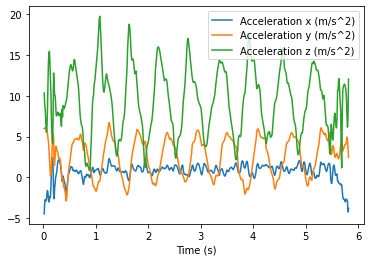

In [4]:
import pandas as pd

df = pd.read_csv("Accelerometer.csv", header=0)

df.plot(x="Time (s)", y=["Acceleration x (m/s^2)", "Acceleration y (m/s^2)", "Acceleration z (m/s^2)"], kind="line")

### **Qual o número de pontos amostrais necessários?**

$$N = \frac{f_s}{\text{resolução}}= \frac{f_s}{\text{0.2}}$$

Como a frequência de amostragem utilizada no experimento foi de $f_s$ = 200 Hz, $N$ = 1000 amostras

### **Quantas médias são necessárias para caracterizar o seu sinal?**

### **Compare o resultado utilizando as janelas Hann, Flat Top e Retangular.**

In [2]:
from scipy import signal
from scipy.fft import fft, fftshift, fftfreq
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hann, flattop, boxcar

In [5]:
# Sampling frequency
f_s = 200 # [Hz]
# Number of sample points
N = 500
# sample spacing
T = 1.0 / f_s
x = df['Time (s)'].to_list()[:N]
y = df['Acceleration y (m/s^2)'].to_list()[:N]
yf = fft(y)
xf = fftfreq(N, T)[:N//2]

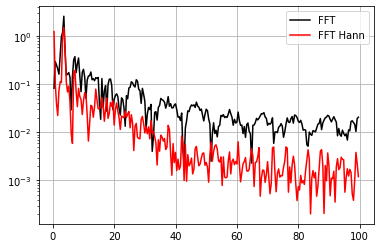

In [6]:
# hann
w_hann = hann(N)
ywf_hann = fft(y*w_hann)

plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-k')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf_hann[1:N//2]), '-r')
plt.legend(['FFT', 'FFT Hann'])
plt.grid()
plt.show()

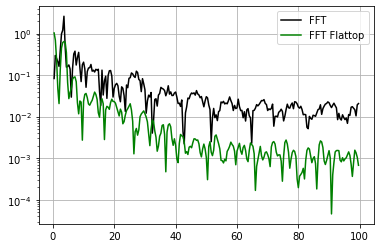

In [7]:
# flattop
w_flattop = flattop(N)
ywf_flattop = fft(y*w_flattop)

plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-k')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf_flattop[1:N//2]), '-g')
plt.legend(['FFT', 'FFT Flattop'])
plt.grid()
plt.show()

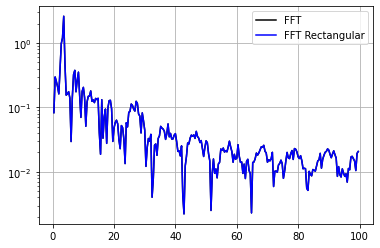

In [8]:
# rectangular
w_boxcar = boxcar(N)
ywf_boxcar = fft(y*w_boxcar)

plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-k')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf_boxcar[1:N//2]), '-b')
plt.legend(['FFT', 'FFT Rectangular'])
plt.grid()
plt.show()

### **Interprete o sinal de vibração e explique o funcionamento do equipamento.**